# vgg example: use it as music feature extractor

### vgg pre-trained models can be used for transfer learning or as feature extractors

---------------

This notebook explains how to use the vgg models in `musicnn_keras` as music feature extractors. `musicnn-keras` allows you to extract features at every layer of the model. For this reason, we first present it – so that you can understand what to expect out of each layer. To start, let's consider this music clip:

In [1]:
file_name = './audio/TRWJAZW128F42760DD_test.mp3'

Run these two lines of code to extract music features with our vgg model trained with the [MagnaTagATune](https://github.com/keunwoochoi/magnatagatune-list) dataset – the `MTT_vgg` model:

In [2]:
from musicnn_keras.extractor import extractor
taggram, tags, features = extractor(file_name, model='MTT_vgg', extract_features=True)

/Users/quintoe/BoxSync/UMG_sync/Projects/Autotagging_multiTaxonomies/venv36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. 

/Users/quintoe/BoxSync/UMG_sync/Projects/Autotagging_multiTaxonomies/venv36/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


Out of the extractor, we get the **output** of the model (the `taggram` and its associated `tags`) and all the **intermediate representations** of it (we refer to those as `features`). The `features` are packed in a dictionary:

In [3]:
list(features.keys())

['pool1', 'pool2', 'pool3', 'pool4', 'pool5']

These different key-features correspond to the outputs of the different layers that our vgg model has. For this reason, it is important that you understand the basic bulding blocks of this model – that we briefly outline in the following diagram:

<br>
<img src="./images/vgg.png">
<br>

All CNN layers (convolutional neural networks) use *same* padding, and all the max-pooling layers use a stride of 2x2 (except for the last max-pooling layer that uses a striding of 4x4).

--------------------
### How do VGG features look like?

They are 3D feature tensors, with dimensions standing for (time, frequency, #filters):

In [4]:
features['pool1'].shape

(920, 48, 128)

In [5]:
features['pool2'].shape

(460, 24, 128)

In [6]:
features['pool3'].shape

(230, 12, 128)

In [7]:
features['pool4'].shape

(110, 6, 128)

In [8]:
features['pool5'].shape

(20, 128)

However, note that `pool5` features are 2D!  

This is because all the max-pooling operators have summarized the frequency content into a single value: (18, **1**, 128).  

For simplicity, instead, we return a 2D representation: (18, 128).

After checking the shape of these tensors, let's depict how these `MTT_vgg` features look like!

In [9]:
%matplotlib inline
import matplotlib.pylab as plt
import matplotlib.gridspec as gridspec
import numpy as np

def depict_features(features, coordinates, title, aspect='auto', xlabel=True, fontsize=13):
    # plot features in coordinates
    ax = plt.subplot(coordinates) 
    plt.imshow(features.T, interpolation=None, aspect=aspect)
    # set title
    ax.title.set_text(title + ' (' + str(features.shape[1]) + ')' )
    ax.title.set_fontsize(fontsize)
    # y-axis
    ax.get_yaxis().set_visible(False)
    # x-axis
    x_label = np.arange(0, features.shape[0], features.shape[0]//5)
    ax.set_xticks(x_label)
    ax.set_xticklabels(x_label, fontsize=fontsize)
    if xlabel:
        ax.set_xlabel('(time)', fontsize=fontsize)

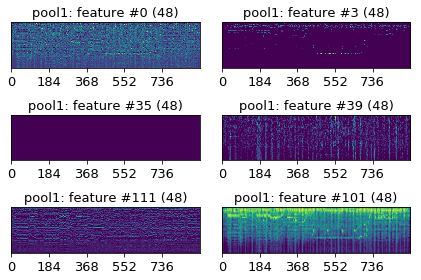

In [10]:
# visualize pool1 features!
gs = gridspec.GridSpec(3, 2) # create a figure having 2 rows and 3 cols.

depict_features(features=features['pool1'][:,:,0],
                coordinates=gs[0, 0],
                title='pool1: feature #0',
                xlabel=False)

depict_features(features=features['pool1'][:,:,35],
                coordinates=gs[1, 0],
                title='pool1: feature #35',
                xlabel=False)

depict_features(features=features['pool1'][:,:,111],
                coordinates=gs[2, 0],
                title='pool1: feature #111',
                xlabel=False)

depict_features(features=features['pool1'][:,:,3],
                coordinates=gs[0, 1],
                title='pool1: feature #3',
                xlabel=False)

depict_features(features=features['pool1'][:,:,39],
                coordinates=gs[1, 1],
                title='pool1: feature #39',
                xlabel=False)

depict_features(features=features['pool1'][:,:,101],
                coordinates=gs[2, 1],
                title='pool1: feature #101',
                xlabel=False)

plt.tight_layout()
plt.show()

**Remark:** Note that we have only depicted 6 (out of 128) feature maps.

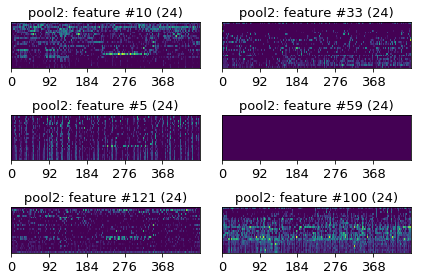

In [11]:
# visualize pool2 features!
gs = gridspec.GridSpec(3, 2) # create a figure having 2 rows and 3 cols.

depict_features(features=features['pool2'][:,:,10],
                coordinates=gs[0, 0],
                title='pool2: feature #10',
                xlabel=False)

depict_features(features=features['pool2'][:,:,5],
                coordinates=gs[1, 0],
                title='pool2: feature #5',
                xlabel=False)

depict_features(features=features['pool2'][:,:,121],
                coordinates=gs[2, 0],
                title='pool2: feature #121',
                xlabel=False)

depict_features(features=features['pool2'][:,:,33],
                coordinates=gs[0, 1],
                title='pool2: feature #33',
                xlabel=False)

depict_features(features=features['pool2'][:,:,59],
                coordinates=gs[1, 1],
                title='pool2: feature #59',
                xlabel=False)

depict_features(features=features['pool2'][:,:,100],
                coordinates=gs[2, 1],
                title='pool2: feature #100',
                xlabel=False)

plt.tight_layout()
plt.show()

**Remark:** Note that we have only depicted 6 (out of 128) feature maps.

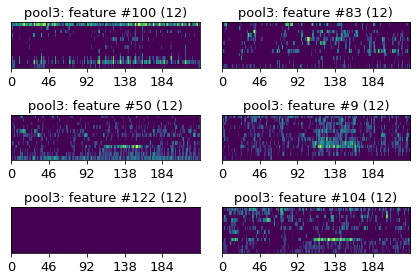

In [12]:
# visualize pool3 features!
gs = gridspec.GridSpec(3, 2) # create a figure having 2 rows and 3 cols.

depict_features(features=features['pool3'][:,:,100],
                coordinates=gs[0, 0],
                title='pool3: feature #100',
                xlabel=False)

depict_features(features=features['pool3'][:,:,50],
                coordinates=gs[1, 0],
                title='pool3: feature #50',
                xlabel=False)

depict_features(features=features['pool3'][:,:,122],
                coordinates=gs[2, 0],
                title='pool3: feature #122',
                xlabel=False)

depict_features(features=features['pool3'][:,:,83],
                coordinates=gs[0, 1],
                title='pool3: feature #83',
                xlabel=False)

depict_features(features=features['pool3'][:,:,9],
                coordinates=gs[1, 1],
                title='pool3: feature #9',
                xlabel=False)

depict_features(features=features['pool3'][:,:,104],
                coordinates=gs[2, 1],
                title='pool3: feature #104',
                xlabel=False)

plt.tight_layout()
plt.show()

**Remark:** Note that we have only depicted 6 (out of 128) feature maps.

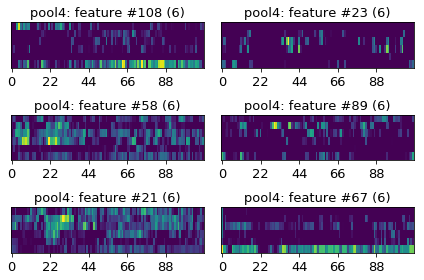

In [13]:
# visualize pool4 features!
gs = gridspec.GridSpec(3, 2) # create a figure having 2 rows and 3 cols.

depict_features(features=features['pool4'][:,:,108],
                coordinates=gs[0, 0],
                title='pool4: feature #108',
                xlabel=False)

depict_features(features=features['pool4'][:,:,58],
                coordinates=gs[1, 0],
                title='pool4: feature #58',
                xlabel=False)

depict_features(features=features['pool4'][:,:,21],
                coordinates=gs[2, 0],
                title='pool4: feature #21',
                xlabel=False)

depict_features(features=features['pool4'][:,:,23],
                coordinates=gs[0, 1],
                title='pool4: feature #23',
                xlabel=False)

depict_features(features=features['pool4'][:,:,89],
                coordinates=gs[1, 1],
                title='pool4: feature #89',
                xlabel=False)

depict_features(features=features['pool4'][:,:,67],
                coordinates=gs[2, 1],
                title='pool4: feature #67',
                xlabel=False)

plt.tight_layout()
plt.show()

**Remark:** Note that we have only depicted 6 (out of 128) feature maps.

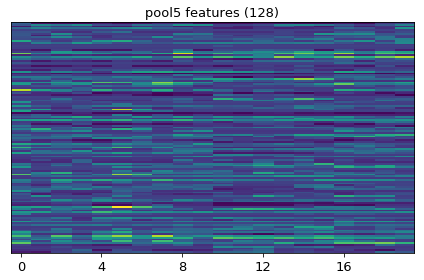

In [14]:
# visualize pool5 features!
gs = gridspec.GridSpec(1, 1) # create a figure having 1 rows and 1 cols.

depict_features(features=features['pool5'],
                coordinates=gs[0, 0],
                title='pool5 features',
                xlabel=False)

plt.tight_layout()
plt.show()

**Remark:** Note that we are depicting all `pool5` features, that are 2D.

----------------
### How does the output taggram look like?

By default, the model takes inputs of 3 seconds (with no overlap). Out of these 3 sec audio-patches, the model estimates the likelihood of the tags. Accordingly, the temporal resolution of the taggran is of 3 seconds.

To conclude, let's visualize the `taggram` output:

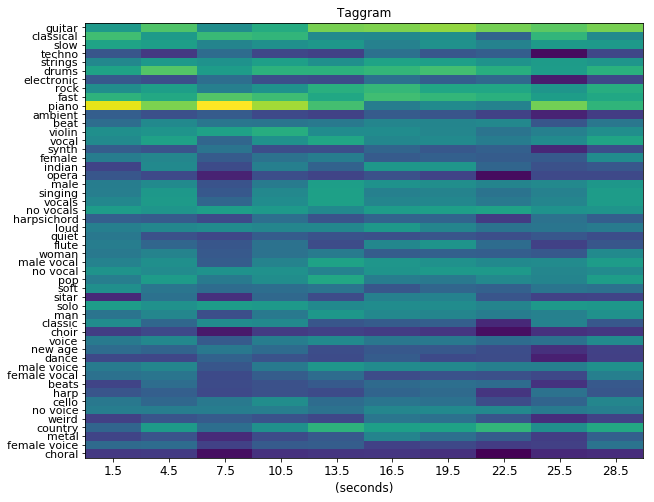

In [15]:
in_length = 3 # seconds -- by default, the model takes inputs of 3 seconds with no overlap

# depict taggram
plt.rcParams["figure.figsize"] = (10,8)
fontsize=12
fig, ax = plt.subplots()
ax.imshow(taggram.numpy().T, interpolation=None, aspect="auto")

# title
ax.title.set_text('Taggram')
ax.title.set_fontsize(fontsize)

# x-axis title
ax.set_xlabel('(seconds)', fontsize=fontsize)

# y-axis
y_pos = np.arange(len(tags))
ax.set_yticks(y_pos)
ax.set_yticklabels(tags, fontsize=fontsize-1)

# x-axis
x_pos = np.arange(taggram.shape[0])
x_label = np.arange(in_length/2, in_length*taggram.shape[0], 3)
ax.set_xticks(x_pos)
ax.set_xticklabels(x_label, fontsize=fontsize)

plt.show()